Student Name : Alish shakya

University ID : 2408638

Dataset Source: Food Delivery TIme Data. The dataset was created by Den_Kuznetz in the year 2024.
The dataset can be accessed through the following Kaggle link: https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction.

##About Dataset

This dataset is designed for predicting food delivery times based on various influencing factors such as distance, weather, traffic conditions, and time of day. It offers a practical and engaging challenge for machine learning practitioners, especially those interested in logistics and operations research.

##Alignment with Real-World Applications

The dataset supports advancements in logistics and operational efficiency by:
Identifying key factors affecting food delivery times.

Helping businesses optimize their delivery routes and resource allocation.
Improving customer experience through better estimated delivery times.
Enhancing decision-making for restaurant and delivery service providers.

##Key Features

Order ID

Distance

Weather Conditions

Traffic Levels

Time of Day

Vehicle Type

Preparation Time

Courier Experience

Delivery Time (Target Variable)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Concept_and_Technology_of_Ai/Coursework/Regression/Food_Delivery_Times.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Weather                   30
Traffic_Level             30
Time_of_Day               30
Courier_Experience_yrs    30
dtype: int64


In [ ]:
df = df.drop(columns=['Order_ID'])
df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].mean(), inplace=True)

<ipython-input-108-79fe516261fb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].mean(), inplace=True)


In [ ]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
count  1000.000000           1000.000000             1000.000000   
mean     10.059970             16.982000                4.579381   
std       5.696656              7.204553                2.870301   
min       0.590000              5.000000                0.000000   
25%       5.105000             11.000000                2.000000   
50%      10.190000             17.000000                4.579381   
75%      15.017500             23.000000                7.000000   
max      19.990000             29.000000                9.000000   

       Delivery_Time_min  
count        1000.000000  
mean           56.732000  
std            22.070915  
min             8.000000  
25%            41.000000  
50%            55.500000  
75%            71.000000  
max           153.000000  


In [ ]:
df.dropna(subset=['Weather', 'Traffic_Level', 'Time_of_Day'], inplace=True)

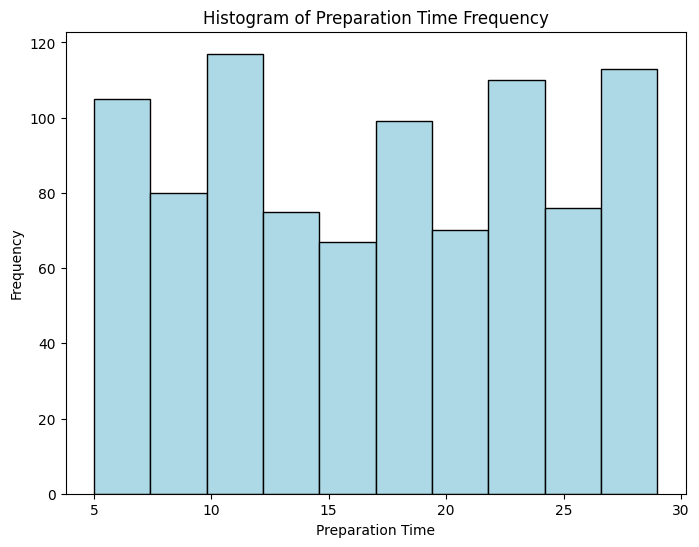

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df['Preparation_Time_min'], bins=10, color='lightblue', edgecolor='black')
plt.title("Histogram of Preparation Time Frequency")
plt.xlabel("Preparation Time")
plt.ylabel("Frequency")
plt.show()
# Insight: Histograms help reveal the distribution

In [ ]:
# Impute missing values with column means for numeric columns
for column in df.select_dtypes(include=[np.number]).columns:
    df[column] = df[column].fillna(df[column].mean())
print("Missing values after dropping rows:")
print(df.isnull().sum())

Missing values after dropping rows:
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


In [ ]:
# Define numeric_cols to include only numeric columns
numeric_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']

for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))][column]
    if len(outliers) > 0:
        print(f"\nOutliers in {column}: {len(outliers)} ({(len(outliers)/len(df)*100):.2f}%)")


Outliers in Delivery_Time_min: 4 (0.44%)


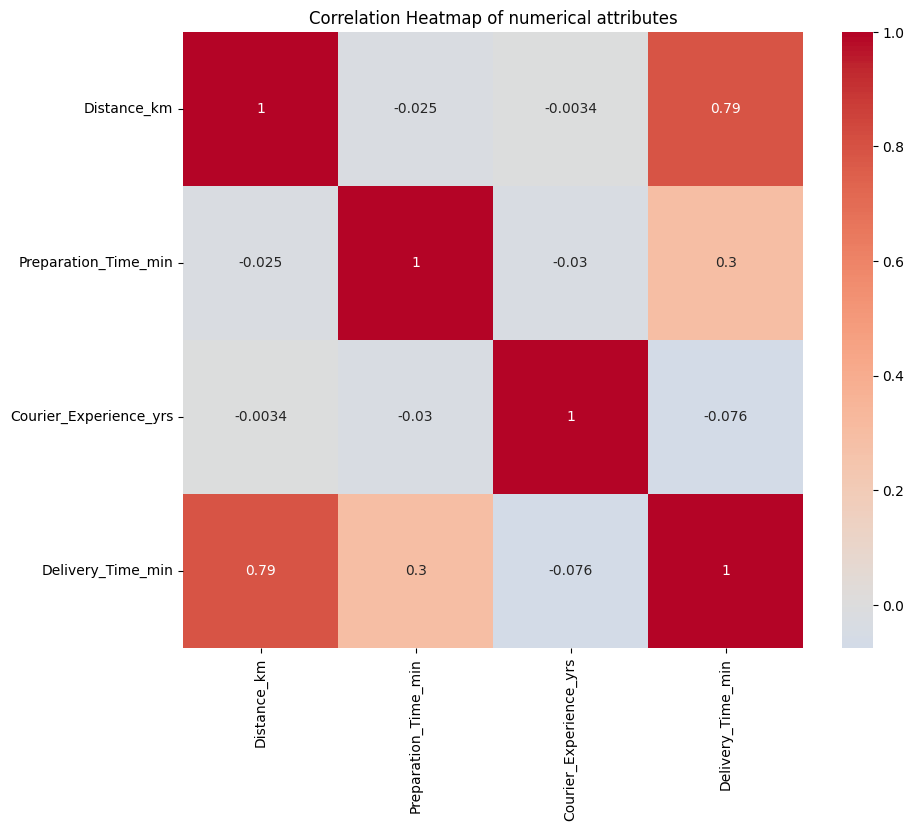

In [ ]:
# Correlation Heatmap
df_numeric = df.drop(columns=['Weather', 'Vehicle_Type', 'Traffic_Level', 'Time_of_Day'])  # Drop 'Time_of_Day' column
# Ensure only numerical features are used for correlation:
df_numeric = df_numeric.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of numerical attributes')
plt.show()

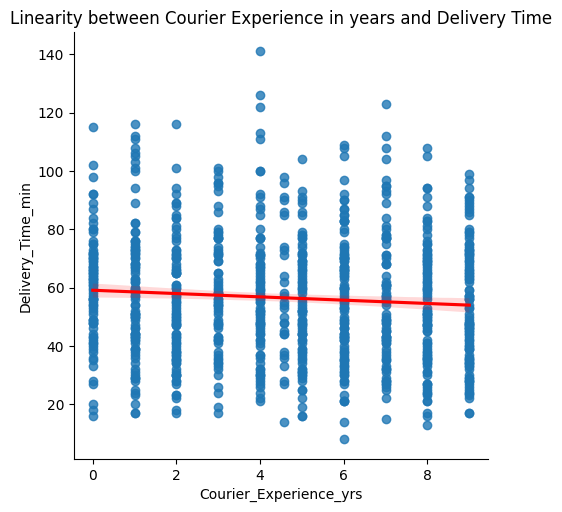

In [ ]:
sns.lmplot(x='Courier_Experience_yrs', y='Delivery_Time_min', data=df, line_kws={'color': 'red'})
plt.title('Linearity between Courier Experience in years and Delivery Time')
plt.show()

##From Scratch Linear Regression


In [ ]:
def train_test_split_scratch(x,y,test_size = 0.3, random_seed = 42):
  """ Parameters:
  This function split dataset into train and test sets.
  Input parameters:
  x: Feature Matrix
  y: Target Matrix
  test_size: Size of Test Set between 0 to 1
  random_seed: Random Seed
  Output Parameters:
  x_train: Feature Matrix Train Set.
  x_test: Feature Matrix Test Set.
  y_train: Target Matrix Train Set.
  y_test: Target Matrix Test Set.
  """
  np.random.seed(random_seed)
  indices = np.arange(x.shape[0])
  np.random.shuffle(indices)

  test_split_size = int(len(x) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]

  x_train,x_test = x[train_indices],x[test_indices]
  y_train,y_test = y[train_indices],y[test_indices]

  return x_train, x_test, y_train, y_test


##Function for Linear Regression

In [ ]:
def linear_cost_function(x, y, w):
  """ Parameters:
  This function finds the Mean Square Error.
  Input parameters:
  X: Feature Matrix
  Y: Target Matrix
  W: Weight Matrix
  Output Parameters:
  cost: accumulated mean square error.
  """
  m = len(y)
  y_pred = np.dot(x, w)
  error = y_pred - y  # Ensure y is a column vector
  cost = (1 / (2 * m)) * np.sum(error ** 2)
  return cost

def linear_gradient_descent(X, Y, W, learning_rate, epochs):
  """
  Perform gradient descent to optimize the parameters of a linear regression model.
  Parameters:
  X (numpy.ndarray): Feature matrix (m x n).
  Y (numpy.ndarray): Target vector (m x 1).
  W (numpy.ndarray): Initial guess for parameters (n x 1).
  learning_rate (float): Learning rate.
  epochs (int): Number of epochs for gradient descent.
  Returns:
  tuple: A tuple containing the final optimized parameters (W_update) and the history of cost values
  .
  W_update (numpy.ndarray): Updated parameters (n x 1).
  cost_history (list): History of cost values over epochs.
  """

  cost_history = [0] * epochs

  W_update = W
  m = len(Y)
  for iteration in range(epochs):

    Y_pred = np.dot(X,W_update)

    loss = Y_pred - Y

    dw = (1/m) * np.dot(X.T,loss)


    W_update = W_update - learning_rate * dw

    cost = linear_cost_function(X, Y, W_update)
    cost_history[iteration] = cost
  return W_update, cost_history

##Function to calculate errors

In [ ]:
def mae(Y, Y_pred):
    """
    This function calculates the Mean Absolute Error (MAE).

    Input Arguments:
    Y: Array of actual (Target) dependent variables.
    Y_pred: Array of predicted dependent variables.

    Output Arguments:
    mae: Mean Absolute Error.
    """
    mae = np.mean(np.abs(Y - Y_pred))
    return mae

def rmse(Y, Y_pred):
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
  Y: Array of actual(Target) Dependent Varaibles.
  Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
  rmse: Root Mean Square.
  """
  rmse = np.sqrt(np.mean((Y-Y_pred)**2))
  return rmse


def r2(Y, Y_pred):
  """
  This Function calculates the R Squared Error.
  Input Arguments:
  Y: Array of actual(Target) Dependent Varaibles.
  Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
  rsquared: R Squared Error.
  """
  mean_y = np.mean(Y)
  ss_tot = np.sum((Y - mean_y) ** 2)
  ss_res = np.sum((Y - Y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2

In [ ]:
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [ ]:
df_encoded = pd.get_dummies(df, columns=["Weather", "Time_of_Day", "Traffic_Level", "Vehicle_Type"], dtype=float)

# Display the modified DataFrame
df_encoded.head()
# from sklearn.preprocessing import StandardScaler
X = df_encoded.drop(columns=['Distance_km']).values
y = df_encoded['Distance_km'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split_scratch(X, y, test_size=0.2, random_seed=52)


W = np.zeros((X_train.shape[1], 1))
W_optimal, cost_history = linear_gradient_descent(X_train, Y_train, W, 0.0001, 10000)

Y_pred = np.dot(X_test, W_optimal)

model_mae = mae(Y_test, Y_pred)
model_rmse = rmse(Y_test, Y_pred)
model_r2 = r2(Y_test, Y_pred)

# Print Results
print("Cost History (First 10 iterations):", cost_history[:10])
print("Mean Absolute Error on Test Set:", model_mae)
print("RMSE on Test Set:", model_rmse)
print("R-Squared on Test Set:", model_r2)

Cost History (First 10 iterations): [29.189242109913735, 15.215838367624468, 9.991172150346028, 8.028574557001829, 7.282388371143076, 6.989906562785717, 6.866758530188672, 6.806917119618153, 6.77084894910813, 6.7438122655450226]
Mean Absolute Error on Test Set: 2.2322437350174265
RMSE on Test Set: 3.08992555888802
R-Squared on Test Set: 0.7090407364174292


In [ ]:
# splitting dataset into train and test sets
X = df_encoded.drop(columns=['Delivery_Time_min']).values
y = df_encoded['Delivery_Time_min'].values.reshape(-1, 1)


X_train, X_test, Y_train, Y_test = train_test_split_scratch(X, y, test_size=0.3, random_seed=52)

In [ ]:
# linear regression model
def linear_cost_function(x, y, w):
  """ Parameters:
  This function finds the Mean Square Error.
  Input parameters:
  X: Feature Matrix
  Y: Target Matrix
  W: Weight Matrix
  Output Parameters:
  cost: accumulated mean square error.
  """
  m = len(y)
  y_pred = np.dot(x, w)
  error = y_pred - y  # Ensure y is a column vector
  cost = (1 / (2 * m)) * np.sum(error ** 2)
  return cost

def linear_gradient_descent(X, Y, W, learning_rate, epochs):
  """
  Perform gradient descent to optimize the parameters of a linear regression model.
  Parameters:
  X (numpy.ndarray): Feature matrix (m x n).
  Y (numpy.ndarray): Target vector (m x 1).
  W (numpy.ndarray): Initial guess for parameters (n x 1).
  learning_rate (float): Learning rate.
  epochs (int): Number of epochs for gradient descent.
  Returns:
  tuple: A tuple containing the final optimized parameters (W_update) and the history of cost values
  .
  W_update (numpy.ndarray): Updated parameters (n x 1).
  cost_history (list): History of cost values over epochs.
  """

  cost_history = [0] * epochs

  W_update = W
  m = len(Y)
  for iteration in range(epochs):

    Y_pred = np.dot(X,W_update)

    loss = Y_pred - Y

    dw = (1/m) * np.dot(X.T,loss)


    W_update = W_update - learning_rate * dw

    cost = linear_cost_function(X, Y, W_update)
    cost_history[iteration] = cost
  return W_update, cost_history


W = np.zeros((X_train.shape[1], 1))
W_optimal, cost_history = linear_gradient_descent(X_train, Y_train, W, 0.0001, 10000)

Y_pred = np.dot(X_test, W_optimal)

model_mae = mae(Y_test, Y_pred)
model_rmse = rmse(Y_test, Y_pred)
model_r2 = r2(Y_test, Y_pred)

# Print Results
print("Cost History (First 10 iterations):", cost_history[:10])
print("Mean Absolute Error on Test Set:", model_mae)
print("RMSE on Test Set:", model_rmse)
print("R-Squared on Test Set:", model_r2)

Cost History (First 10 iterations): [1644.3775111233374, 1512.4179568873042, 1392.1458984675194, 1282.5209429391598, 1182.5953514020496, 1091.505787197088, 1008.4657990304157, 932.7589735540679, 863.732697780991, 800.7924770222664]
Mean Absolute Error on Test Set: 7.786070878052336
RMSE on Test Set: 12.05152177047667
R-Squared on Test Set: 0.7295575053767076


In [ ]:
# random forest regressor model
from sklearn.ensemble import RandomForestRegressor

X = df_encoded.drop(columns=['Delivery_Time_min']).values
y = df_encoded['Delivery_Time_min'].values.reshape(-1, 1)


X_train, X_test, Y_train, Y_test = train_test_split_scratch(X, y, test_size=0.3, random_seed=52)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train.ravel())


y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the Model
model_mae = mae(Y_test, y_pred)
model_rmse = rmse(Y_test, Y_pred)
model_r2 = r2(Y_test, Y_pred)

print(f"Mean Absolute Error (MAE): {model_mae}")
print(f"Root Mean Squared Error (RMSE): {model_rmse}")
print(f"R_squared Score: {model_r2}")


Mean Absolute Error (MAE): 24.171236297280256
Root Mean Squared Error (RMSE): 12.05152177047667
R_squared Score: 0.7295575053767076


In [ ]:
# cross validation for linear regression
from sklearn.model_selection import KFold

def cross_validate(X, Y, learning_rates, epochs_list, k_folds=5):
    """
    Perform cross-validation to find the best hyperparameters (learning_rate, epochs).

    Parameters:
    X (numpy.ndarray): Feature matrix (m x n).
    Y (numpy.ndarray): Target vector (m x 1).
    learning_rates (list): List of learning rates to test.
    epochs_list (list): List of epoch values to test.
    k_folds (int): Number of folds for cross-validation (default is 5).

    Returns:
    best_learning_rate (float): Best learning rate based on cross-validation.
    best_epochs (int): Best number of epochs based on cross-validation.
    """

    best_cost = float('inf')
    best_learning_rate = None
    best_epochs = None

    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    for learning_rate in learning_rates:
        for epochs in epochs_list:
            total_cost = 0

            for train_index, val_index in kf.split(X):
                X_train, X_val = X[train_index], X[val_index]
                Y_train, Y_val = Y[train_index], Y[val_index]

                W_initial = np.zeros((X_train.shape[1], 1))

                # Perform gradient descent
                W_optimal, _ = linear_gradient_descent(X_train, Y_train, W_initial, learning_rate, epochs)

                # Compute cost on validation set
                val_cost = linear_cost_function(X_val, Y_val, W_optimal)
                total_cost += val_cost


            avg_cost = total_cost / k_folds


            if avg_cost < best_cost:
                best_cost = avg_cost
                best_learning_rate = learning_rate
                best_epochs = epochs

    return best_learning_rate, best_epochs

learning_rates = [0.0001, 0.00001]
epochs_list = [500, 1000, 2000, 5000, 10000]

best_lr, best_epochs = cross_validate(X, y, learning_rates, epochs_list)
print(f"Best learning rate: {best_lr}, Best epochs: {best_epochs}")

Best learning rate: 0.0001, Best epochs: 10000


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],     # Number of trees
    'max_depth': [None, 10, 20, 30],    # Depth of each tree
    'min_samples_split': [2, 5, 10],    # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum samples per leaf
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Using MSE as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train.ravel())

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# for linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


lr_model = LinearRegression()

# Create an RFE object (select top k features)
selector = RFE(lr_model, n_features_to_select=5, step=1)  # Adjust n_features_to_select

# Fit RFE to the data
selector = selector.fit(X, y)

selected_features_lr = df_encoded.drop(columns=['Delivery_Time_min']).columns[selector.get_support()]

print("Selected Features for Linear Regression:", selected_features_lr)

In [ ]:
# for random forest regressor model

rf_model = RandomForestRegressor(random_state=32)
rf_model.fit(X, y.ravel())

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': df_encoded.drop("Trip_Price", axis=1).columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

selected_features_rf = importance_df['Feature'][:5].tolist()

print("Selected Features for Random Forest Regression:", selected_features_rf)

KeyError: "['Trip_Price'] not found in axis"

In [ ]:
# linear regression model using the optimized hyper-parameters
def linear_cost_function(x, y, w):
  """ Parameters:
  This function finds the Mean Square Error.
  Input parameters:
  X: Feature Matrix
  Y: Target Matrix
  W: Weight Matrix
  Output Parameters:
  cost: accumulated mean square error.
  """
  m = len(y)
  y_pred = np.dot(x, w)
  error = y_pred - y  # Ensure y is a column vector
  cost = (1 / (2 * m)) * np.sum(error ** 2)
  return cost

def linear_gradient_descent(X, Y, W, learning_rate, epochs):
  """
  Perform gradient descent to optimize the parameters of a linear regression model.
  Parameters:
  X (numpy.ndarray): Feature matrix (m x n).
  Y (numpy.ndarray): Target vector (m x 1).
  W (numpy.ndarray): Initial guess for parameters (n x 1).
  learning_rate (float): Learning rate.
  epochs (int): Number of epochs for gradient descent.
  Returns:
  tuple: A tuple containing the final optimized parameters (W_update) and the history of cost values
  .
  W_update (numpy.ndarray): Updated parameters (n x 1).
  cost_history (list): History of cost values over epochs.
  """

  cost_history = [0] * epochs

  W_update = W
  m = len(Y)
  for iteration in range(epochs):

    Y_pred = np.dot(X,W_update)

    loss = Y_pred - Y

    dw = (1/m) * np.dot(X.T,loss)


    W_update = W_update - learning_rate * dw

    cost = linear_cost_function(X, Y, W_update)
    cost_history[iteration] = cost
  return W_update, cost_history


# selecting the best features
X = df_encoded[selected_features_lr].values
y = df_encoded['Trip_Price'].values.reshape(-1, 1)

# spliting the database
X_train, X_test, Y_train, Y_test = train_test_split_scratch(X, y, test_size=0.3, random_seed=52)

W = np.zeros((X_train.shape[1], 1))
W_optimal, cost_history = linear_gradient_descent(X_train, Y_train, W, 0.0001, 10000)

Y_pred = np.dot(X_test, W_optimal)

model_mae = mae(Y_test, Y_pred)
model_rmse = rmse(Y_test, Y_pred)
model_r2 = r2(Y_test, Y_pred)

# Print Results
print("Cost History (First 10 iterations):", cost_history[:10])
print("Mean Absolute Error on Test Set:", model_mae)
print("RMSE on Test Set:", model_rmse)
print("R-Squared on Test Set:", model_r2)

In [ ]:
# random forest regressor using the optimized hyper-parameter

from sklearn.ensemble import RandomForestRegressor

# selecting the best features
X = df_encoded[selected_features_rf].values
y = df_encoded['Delivery_Time_min'].values.reshape(-1, 1)

# spliting the database
X_train, X_test, Y_train, Y_test = train_test_split_scratch(X, y, test_size=0.3, random_seed=52)

rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=1, min_samples_split=5, random_state=42)
rf_model.fit(X_train, Y_train.ravel())

y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the Model
model_mae = mae(Y_test, y_pred)
model_rmse = rmse(Y_test, Y_pred)
model_r2 = r2(Y_test, Y_pred)

print(f"Mean Absolute Error (MAE): {model_mae}")
print(f"Root Mean Squared Error (RMSE): {model_rmse}")
print(f"R_squared Score: {model_r2}")
